<a href="https://colab.research.google.com/github/youtsumi/HinOTORITransmission/blob/master/HinOTORIFocusDriftStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files = files.upload()

Saving out_Ic.txt to out_Ic.txt
Saving out_Rc.txt to out_Rc.txt
Saving out_u.txt to out_u.txt


Data took from /mnt/data5/users/gcn/hinotori/analysis/ana/20191112-sky

In [ ]:
from astropy.io import ascii
import numpy
import pylab
rc = ascii.read("out_Rc.txt")

Data looks like the blow

In [ ]:
rc

EXP-ID,FILTER,MJD,EXPTIME,FOC-VAL,EL,TEMPCCD,ZMAG,ZMAG_ERR,SEEING,APERTURE,UL,UL_ERR,SKYN,SKYN_ERR
str9,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HT0001314,Rc,58799.71105324074,10.0,3.939794,36.79861111111111,-28.47470175,24.12636277008057,0.007744538153374184,4.43,13.29,16.7908849091933,0.01483749805789804,171.8783358050256,2.003512803792323
HT0001315,Rc,58799.71251157407,30.0,3.789934,36.78694444444444,-28.930473,25.38707834320068,0.009506165183636412,8.76,26.28,16.1497125668247,0.00985821596097089,990.7778895909487,2.3826291517232
HT0001316,Rc,58799.71299768519,30.0,3.819906,36.78277777777777,-29.181933,25.37418402862549,0.007059903254006957,7.09,21.27,16.52243246827648,0.01311809942564891,694.5933479549585,7.073218165514451
HT0001317,Rc,58799.713483796295,30.0,3.849878,36.77888888888889,-29.47425525,25.33239324340821,0.00508470158483001,5.05,15.15,17.04670743298679,0.01409891379760072,412.3863862188248,4.994696666204915
HT0001318,Rc,58799.71396990741,30.0,3.87985,36.77472222222222,-29.78229375,25.29456286926269,0.004736928761865595,3.86,11.58,17.43630144781626,0.005385974133477874,278.1855480038101,0.6567503431031804
HT0001319,Rc,58799.714467592596,30.0,3.909822,36.77055555555555,-30.12176475,25.26647588348388,0.005048875287904265,3.03,9.09,17.71529337666786,0.01125753725357683,209.6539254851771,1.942928857413022
HT0001320,Rc,58799.714953703704,30.0,3.939794,36.76638888888889,-30.439233,25.29552526626587,0.004863380112685074,3.45,10.35,17.57734619668392,0.006227616159816923,244.5128138282391,0.8760065299996515
HT0001321,Rc,58799.71543981481,30.0,3.969766,36.76222222222222,-30.652974,25.33614289703369,0.004785166491821729,4.71,14.13,17.19331850103875,0.008009012843185368,361.542830744067,2.138596336895696
HT0001322,Rc,58799.71592592593,30.0,3.999992,36.75777777777778,-30.75041475,25.37608169708252,0.007275851397505835,6.97,20.91,16.61598486652286,0.01385239708851624,638.3645005351503,6.930667703445521


(0, 0.1)

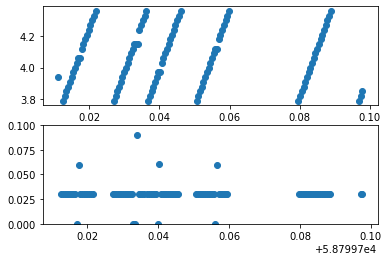

In [ ]:
pylab.subplot(211)
pylab.plot(rc["MJD"],rc["FOC-VAL"],"o")
pylab.subplot(212)
pylab.plot((rc["MJD"][1:]+rc["MJD"][:-1])*0.5,numpy.diff(rc["FOC-VAL"]),"o")
pylab.ylim(0,0.1)

In [ ]:
(pylab.plot(numpy.diff(rc["MJD"])*24*60)
pylab.ylabel("min")

SyntaxError: ignored

Every 20 datapoint, there are spikes that corresponds to a large focus swing happens.

Let's plot it and fit datapoint with 2nd order of polynomial

3.1539556129628172
2.9126145023357646
2.927492774458165
3.0653901425918137
2.9705057824923444


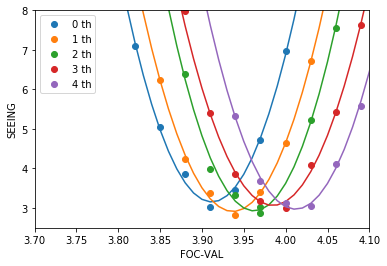

In [ ]:
def plot( table ):
  xlabel = "FOC-VAL"
  ylabel = "SEEING"
  minfwhm = table[xlabel].min()
  maxfwhm = table[xlabel].max()
  x=numpy.arange(minfwhm,maxfwhm,0.01)

  idx = numpy.where(table[xlabel]==minfwhm)[0]

  zvalues = []
  for num, start in enumerate(idx[:-1]):
    subset = table[start:idx[num+1]]
    p=pylab.plot(subset[xlabel],subset[ylabel],"o",label="{} th".format(num))
    
    seeingmin=subset["SEEING"].argmin()
    delta = 3 # specify how many data point you want to use?
    fit=numpy.polyfit( subset[xlabel][seeingmin-delta:seeingmin+delta+1],
                  subset[ylabel][seeingmin-delta:seeingmin+delta+1],2 )
    pylab.plot(x,numpy.poly1d(fit)(x),color=p[0].get_color())

    a=fit[0]
    b=fit[1]
    c=fit[2]
    zvalues.append(-b/(2*a))
    print(-(b**2-4*a*c)/(4*a))

  pylab.xlabel(xlabel)
  pylab.ylabel(ylabel)
  pylab.legend()
  pylab.ylim(2.5,8)
  pylab.xlim(3.70,4.10)

  return zvalues


zvalues = numpy.array(plot(rc))

Colors differ sequences. It looks drifting. Also in the second trial, it seems the command to change focus failed at the place where the minimum seeing is given. 

A plot of the FOC-VAL giving the minumu SEEING goes straight. It is weird. This doesn't look the effect of natural seeing but could be artifacts.

Text(0, 0.5, 'FOC-VAL giving the best SEEING')

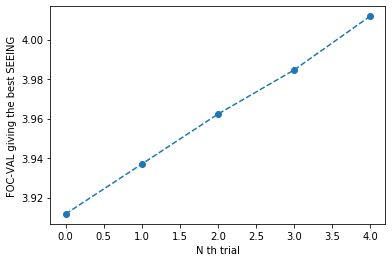

In [ ]:
pylab.plot(zvalues,"o--")
pylab.xlabel("N th trial")
pylab.ylabel("FOC-VAL giving the best SEEING")

Taking moving diff gives almost constant trend. The jump at third data point happened when the jump in the green plot above happened. It is interesting.

Text(0, 0.5, 'mm/swing')

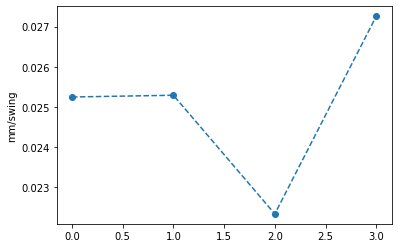

In [ ]:
pylab.plot(numpy.diff(zvalues),"o--")
numpy.median(numpy.diff(zvalues))
pylab.ylabel("mm/swing")

If we suppose the shift happens when the large swing occurs, then the plot becomes better. The plot below is a version with an offset with an amount of 0.025mm/swing. 


In [ ]:
table = rc
Offset = numpy.zeros(len(table))
Offset[numpy.where(numpy.diff(rc["FOC-VAL"])>0.050)[0]] = 0.025266922311848905 
Offset = numpy.cumsum(Offset)
Offset

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02526692, 0.02526692, 0.02526692, 0.02526692,
       0.02526692, 0.02526692, 0.02526692, 0.02526692, 0.02526692,
       0.02526692, 0.02526692, 0.02526692, 0.02526692, 0.02526692,
       0.02526692, 0.02526692, 0.02526692, 0.02526692, 0.02526692,
       0.02526692, 0.02526692, 0.02526692, 0.02526692, 0.02526692,
       0.05053384, 0.05053384, 0.05053384, 0.05053384, 0.05053384,
       0.05053384, 0.05053384, 0.05053384, 0.05053384, 0.05053384,
       0.05053384, 0.05053384, 0.05053384, 0.07580077, 0.07580077,
       0.07580077, 0.07580077, 0.07580077, 0.07580077, 0.07580077,
       0.07580077, 0.07580077, 0.07580077, 0.07580077, 0.07580077,
       0.07580077, 0.07580077, 0.07580077, 0.07580077, 0.07580077,
       0.07580077, 0.07580077, 0.07580077, 0.07580077, 0.07580077,
       0.07580077, 0.07580077, 0.07580077, 0.10106769, 0.10106

[3.9117046308635803,
 3.911682889845499,
 3.900284308224094,
 3.908766924132227,
 3.9107588107560134]

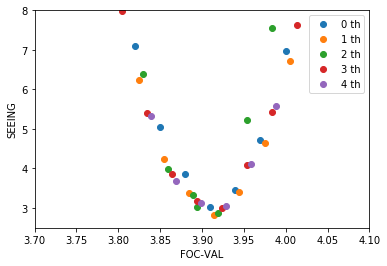

In [ ]:
def plotoffset( table ):
  xlabel = "FOC-VAL"
  ylabel = "SEEING"
  minfwhm = table[xlabel].min()
  maxfwhm = table[xlabel].max()
  x=numpy.arange(minfwhm,maxfwhm,0.01)

  idx = numpy.where(table[xlabel]==minfwhm)[0]

  zvalues = []

  for num, start in enumerate(idx[:-1]):
    subset = table[start:idx[num+1]]
#    offset = num*0.029971999999999888    
#    offset = num*0.025266922311848905   # mm/swing ??
#    offset = 0.025266922311848905/20*(numpy.arange(20)+start) # mm/focusing
    offset = Offset[start:idx[num+1]]

    p=pylab.plot(subset[xlabel]-offset,subset[ylabel],"o",label="{} th".format(num))

    seeingmin=subset["SEEING"].argmin()
    delta = 3
    fit=numpy.polyfit( (subset[xlabel]-offset)[seeingmin-delta:seeingmin+delta+1],
                  subset[ylabel][seeingmin-delta:seeingmin+delta+1],2 )
#    pylab.plot(x,numpy.poly1d(fit)(x),color=p[0].get_color())

    a=fit[0]
    b=fit[1]
    c=fit[2]
    zvalues.append(-b/(2*a))

  pylab.xlabel(xlabel)
  pylab.ylabel(ylabel)
  pylab.legend()
  pylab.ylim(2.5,8)
  pylab.xlim(3.70,4.10)

  return zvalues


plotoffset(rc)


Looks good. So I wonder if the large swing or ever time we change focus causes this offset. 0.025mm/swing seems quite large though. It roughly corresponds to 100 steps in the encoder. If this offset happens when every focusing happens, 5 steps. What this means?

Should we lower the motor speed? But we have an encoder. Why it could happen?

One possibility is failures when focusing command issued.

In [ ]:
ic = ascii.read("out_Ic.txt")

3.0227155529944243
2.7589282639386874
2.8618606945397578
2.8667638182171418
2.8180264013928684


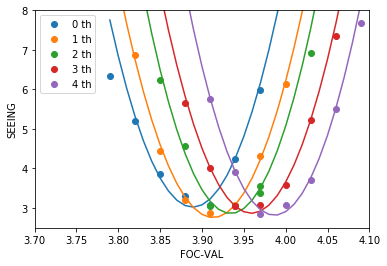

In [ ]:
zvalues = numpy.array(plot(ic))

[3.8890603881745203,
 3.88803142234502,
 3.882927898672486,
 3.883270469963238,
 3.885488507970182]

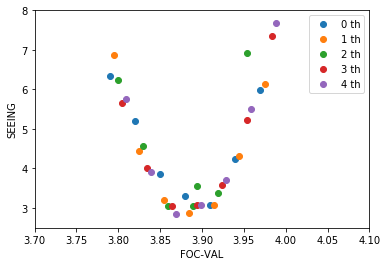

In [ ]:
plotoffset(ic)

Seems like the seeing is somwhow limited.

In [ ]:
ic[ic["SEEING"].argsort()]

EXP-ID,FILTER,MJD,EXPTIME,FOC-VAL,EL,TEMPCCD,ZMAG,ZMAG_ERR,SEEING,APERTURE,UL,UL_ERR,SKYN,SKYN_ERR
str9,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HT0001401,Ic,58799.782534722224,30.0,3.969766,35.7875,-30.02118075,24.32813191146851,0.003698190294003817,2.86,8.58,17.22086721185745,0.005324542473013066,139.2951115605341,0.491459688275671
HT0001339,Ic,58799.72893518519,30.0,3.909822,36.62777777777778,-30.062043,24.26351405181885,0.003167341844360841,2.87,8.61,17.15431564614342,0.009205375422423747,139.5434184750592,1.110875386551277
HT0001359,Ic,58799.73872685185,30.0,3.909822,36.50972222222222,-30.06518625,24.30912831726074,0.003162261461112319,3.04,9.120000000000001,17.08009354064251,0.007483307699002353,155.8274293652277,0.9734160124134063
HT0001360,Ic,58799.739212962966,30.0,3.939794,36.50361111111111,-30.05889975,24.31098233184814,0.003163787065827376,3.05,9.149999999999999,17.20989979492019,0.006645460400013702,138.5042214610628,0.7455049760341903
HT0001380,Ic,58799.75303240741,30.0,3.939794,36.30777777777777,-30.04632675,24.32070229492187,0.00305736995036581,3.05,9.149999999999999,17.11776098085634,0.01135738287652132,152.127077197312,1.53258717017181
HT0001402,Ic,58799.78302083333,30.0,3.999992,35.77805555555555,-30.0054645,24.32690418701172,0.003153057003220654,3.07,9.209999999999999,17.08339919358188,0.01306082589246901,157.9181301499173,1.843482939826861
HT0001319,Ic,58799.714467592596,30.0,3.909822,36.77055555555555,-30.3449355,24.29565781860352,0.003199844224128616,3.07,9.209999999999999,17.19911045001939,0.005275260974476548,137.9268897866203,0.5327823519825533
HT0001340,Ic,58799.72943287037,30.0,3.939794,36.62222222222222,-30.062043,24.30367606201172,0.003105312532541913,3.08,9.24,17.03511346482228,0.006771651144780249,161.6050896708396,0.8956920699996517
HT0001381,Ic,58799.75351851852,30.0,3.969766,36.30027777777777,-30.04632675,24.32242556457519,0.003064916400443635,3.08,9.24,17.12309919548315,0.005231666882274556,151.6214142824555,0.5920935263790741


In [ ]:
u = ascii.read("out_u.txt")

In [ ]:
u

EXP-ID,FILTER,MJD,EXPTIME,FOC-VAL,EL,TEMPCCD,ZMAG,ZMAG_ERR,SEEING,APERTURE,UL,UL_ERR,SKYN,SKYN_ERR
str9,str1,float64,float64,float64,float64,float64,str5,str5,str5,str5,str5,str5,str5,str5
HT0001314,u,58799.71105324074,10.0,3.939794,36.79861111111111,-30.05261325,False,False,False,False,False,False,False,False
HT0001315,u,58799.71251157407,30.0,3.789934,36.78694444444444,-30.1060485,False,False,False,False,False,False,False,False
HT0001316,u,58799.71299768519,30.0,3.819906,36.78277777777777,-30.11547825,False,False,False,False,False,False,False,False
HT0001317,u,58799.713483796295,30.0,3.849878,36.77888888888889,-30.0934755,False,False,False,False,False,False,False,False
HT0001318,u,58799.71396990741,30.0,3.87985,36.77472222222222,-30.07775925,False,False,False,False,False,False,False,False
HT0001319,u,58799.714467592596,30.0,3.909822,36.77055555555555,-30.06518625,False,False,False,False,False,False,False,False
HT0001320,u,58799.714953703704,30.0,3.939794,36.76638888888889,-30.062043,False,False,False,False,False,False,False,False
HT0001321,u,58799.71543981481,30.0,3.969766,36.76222222222222,-30.05261325,False,False,False,False,False,False,False,False
HT0001322,u,58799.71592592593,30.0,3.999992,36.75777777777778,-30.03375375,False,False,False,False,False,False,False,False


UFuncTypeError: ignored

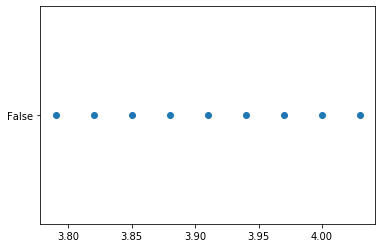

In [ ]:
zvalues = numpy.array(plot(u))

3.8857003684081137 3.0104261556822802


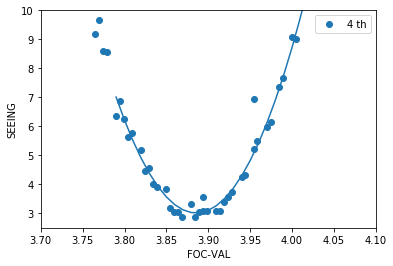

In [ ]:
from scipy.stats import sigmaclip
def plotoffsetonce( table ):
  xlabel = "FOC-VAL"
  ylabel = "SEEING"
  minfwhm = table[xlabel].min()
  maxfwhm = table[xlabel].max()
  x=numpy.arange(minfwhm,maxfwhm,0.01)

  idx = numpy.where(table[xlabel]==minfwhm)[0]

  zvalues = []

  xarr = []
  yarr = []

  for num, start in enumerate(idx[:-1]):
    subset = table[start:idx[num+1]]
    offset = Offset[start:idx[num+1]]

    xarr.append(subset[xlabel]-offset)
    yarr.append(subset[ylabel])

  xarr = numpy.array(xarr).flatten()
  yarr = numpy.array(yarr).flatten()
  p=pylab.plot(xarr,yarr,"o",label="{} th".format(num))

  seeingmin=subset["SEEING"].argmin()
  delta = 3
  cond = numpy.where( (yarr >4)&(yarr<6))
  fit=numpy.polyfit( xarr[cond], yarr[cond] ,2 )
  pylab.plot(x,numpy.poly1d(fit)(x),color=p[0].get_color())

  a=fit[0]
  b=fit[1]
  c=fit[2]
  print(-b/(2*a), -(b**2-4*a*c)/(4*a))

  pylab.xlabel(xlabel)
  pylab.ylabel(ylabel)
  pylab.legend()
  pylab.ylim(2.5,10)
  pylab.xlim(3.70,4.10)

plotoffsetonce(ic)